In [1]:
import pandas as pd
import re       #for regular 
import nltk     #to remove stop words
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas

from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johnp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
with open(r'C:/Users/johnp/OneDrive/Projects/HUME_TextAnalysis/A_Treatise_of_Human_Nature.txt','r') as file:
    treatise = file.read().lower().replace('.','').replace(',','').replace(';','').replace('  ','').replace('ideas','idea').replace('objects','object').replace('\n',' ').replace('causes','cause').replace('impressions', 'impression').replace('perceptions','perception').replace('effects', 'effect')

with open(r'C:/Users/johnp/OneDrive/Projects/HUME_TextAnalysis/Treatise_BookI_PartI.txt','r') as file:
    treat_b1p1 = file.read().lower().replace('.','').replace(',','').replace(';','').replace('  ','').replace('ideas','idea').replace('objects','object').replace('\n',' ').replace('causes','cause').replace('impressions', 'impression').replace('perceptions','perception').replace('effects', 'effect')    
    
with open(r'C:/Users/johnp/OneDrive/Projects/HUME_TextAnalysis/Treatise_BookI_PartII.txt','r') as file:
    treat_b1p2 = file.read().lower().replace('.','').replace(',','').replace(';','').replace('  ','').replace('ideas','idea').replace('objects','object').replace('\n',' ').replace('causes','cause').replace('impressions', 'impression').replace('perceptions','perception').replace('effects', 'effect')        
    
with open(r'C:/Users/johnp/OneDrive/Projects/HUME_TextAnalysis/Treatise_BookI_PartIII.txt','r') as file:
    treat_b1p3 = file.read().lower().replace('.','').replace(',','').replace(';','').replace('  ','').replace('ideas','idea').replace('objects','object').replace('\n',' ').replace('causes','cause').replace('impressions', 'impression').replace('perceptions','perception').replace('effects', 'effect')        
    
with open(r'C:/Users/johnp/OneDrive/Projects/HUME_TextAnalysis/Treatise_BookI_PartIV.txt','r') as file:
    treat_b1p4 = file.read().lower().replace('.','').replace(',','').replace(';','').replace('  ','').replace('ideas','idea').replace('objects','object').replace('\n',' ').replace('causes','cause').replace('impressions', 'impression').replace('perceptions','perception').replace('effects', 'effect')       

In [3]:
words = treatise.split(' ')
words_b1p1 = treat_b1p1.split(' ')
words_b1p2 = treat_b1p2.split(' ')
words_b1p3 = treat_b1p3.split(' ')
words_b1p4 = treat_b1p4.split(' ')

In [4]:
def create_stop(add_stop=[]):
    '''
    Input: list of strings to add to the stop list
    Function creates a stop word list using nltk english stopwords, extends this list with 
        whatever is added as a variable
    Return: none
    '''
    add_stop.extend(add_stop)
    stop_words = list(nltk.corpus.stopwords.words('english'))
    stop_words.extend(add_stop)
    return stop_words


In [5]:
stop_words = create_stop(add_stop = ['may','one', 'must', 'upon','through','it','us','even'])

In [6]:
def term_count(words):
    '''
    Input (list) words as list of strings
    Remove stopwords, identify unique words, and count the number of 
        instances of the uniqe word from the original list (less stop words)
    Return sorted dictionary with key = word, value = term frequency sorted 
        by most frequent terms first   
    '''
    words_efficient = []
    unique_words = []    
    tf = {}
    updated_dict = {}
    
    #Remove words from list that are stop words
    for word in words: 
        if not word in stop_words:
            words_efficient.append(word)
    
    #Identify unique words
    for word in words_efficient:
        if word not in unique_words:
            unique_words.append(word)  
    
    #create dictionary with key = word; value = frequency of word
    for word in unique_words:
        tf[word] = sum(1 for i in words_efficient if i == word)
    
    #Sort dictionary by value with most frequent terms first
    for value in sorted(tf, key=tf.get, reverse = True):
        updated_dict[value] = tf[value]
    
    return updated_dict
    

In [10]:
def term_frequency(words):
    '''
    Input (list) words as list of strings
    Remove stopwords, identify unique words, and count the number of 
        instances of the uniqe word from the original list (less stop words)
    Return sorted dictionary with key = word, value = term frequency sorted 
        by most frequent terms first   
    '''
    words_efficient = []
    unique_words = []    
    tf = {}
    updated_dict = {}
    
    #Remove words from list that are stop words
    for word in words: 
        if word not in stop_words:
            words_efficient.append(word)
    
    #Identify unique words
    for word in words_efficient:
        if word not in unique_words:
            unique_words.append(word)  
    
    #create dictionary with key = word; value = frequency of word
    for word in unique_words:
        tf[word] = sum(1 for i in words_efficient if i == word)
    
    #Sort dictionary by value with most frequent terms first
    for value in sorted(tf, key=tf.get, reverse = True):
        updated_dict[value] = tf[value]
    
    return updated_dict

In [11]:
#dict_all = term_count(words)

In [12]:
#dict_b1p4

In [13]:
dict_b1p1 = term_count(words_b1p1)
dict_b1p2 = term_count(words_b1p2)
dict_b1p3 = term_count(words_b1p3)
dict_b1p4 = term_count(words_b1p4)  
    

In [14]:
#using b1p1 create term frequency
for word in dict_b1p1:
        dict_b1p1[word] = dict_b1p1[word]/len(dict_b1p1)

for word in dict_b1p2:
        dict_b1p2[word] = dict_b1p2[word]/len(dict_b1p2)

for word in dict_b1p3:
        dict_b1p3[word] = dict_b1p3[word]/len(dict_b1p3)

for word in dict_b1p4:
        dict_b1p4[word] = dict_b1p4[word]/len(dict_b1p4)


In [15]:
#create doc frequency
docfreq = {}
for word in words:
    temp = 0
    if word in words_b1p1:
        temp = temp + 1
    if word in words_b1p2:
        temp = temp + 1
    if word in words_b1p3:
        temp = temp + 1
    if word in words_b1p4:
        temp = temp + 1
    docfreq[word] = temp

In [16]:
for word in dict_b1p1:
    dict_b1p1[word] = docfreq[word] * dict_b1p1[word]
    
for word in dict_b1p2:
    dict_b1p2[word] = docfreq[word] * dict_b1p2[word]
    
for word in dict_b1p3:
    dict_b1p3[word] = docfreq[word] * dict_b1p3[word]
    
for word in dict_b1p4:
    dict_b1p4[word] = docfreq[word] * dict_b1p4[word]

In [17]:
dict_b1p1

{'idea': 0.6650124069478908,
 '': 0.4003308519437552,
 'impression': 0.2547559966914806,
 'particular': 0.12903225806451613,
 'object': 0.12241521918941274,
 'simple': 0.11248966087675766,
 'mind': 0.10587262200165426,
 'different': 0.10256410256410256,
 'relation': 0.09925558312655088,
 'general': 0.09263854425144748,
 'first': 0.08933002481389578,
 'imagination': 0.0827129859387924,
 'form': 0.07278742762613731,
 'quality': 0.07278742762613731,
 'two': 0.06617038875103391,
 'cause': 0.06617038875103391,
 'consider': 0.06286186931348221,
 'without': 0.06286186931348221,
 'resemblance': 0.05955334987593052,
 'colour': 0.05955334987593052,
 'perception': 0.05624483043837883,
 'either': 0.05624483043837883,
 'correspondent': 0.05624483043837883,
 'shall': 0.05293631100082713,
 'present': 0.05293631100082713,
 'every': 0.05293631100082713,
 'though': 0.05293631100082713,
 'complex': 0.03970223325062035,
 'betwixt': 0.04962779156327544,
 'therefore': 0.04962779156327544,
 'nothing': 0.0496

In [18]:
wc_b1p1 = WordCloud(background_color="white",
                    width=1000,
                    height=1000, 
                    max_words=15,
                    relative_scaling=0.5,
                    normalize_plurals=True).generate_from_frequencies(dict_b1p1)

wc_b1p2 = WordCloud(background_color="white",
               width=1000,
               height=1000, 
               max_words=15,
               relative_scaling=0.5,
               normalize_plurals=True).generate_from_frequencies(dict_b1p2)

wc_b1p3 = WordCloud(background_color="white",
               width=1000,
               height=1000, 
               max_words=15,
               relative_scaling=0.5,
               normalize_plurals=True).generate_from_frequencies(dict_b1p3)

wc_b1p4 = WordCloud(background_color="white",
               width=1000,
               height=1000, 
               max_words=15,
               relative_scaling=0.5,
               normalize_plurals=True).generate_from_frequencies(dict_b1p4)

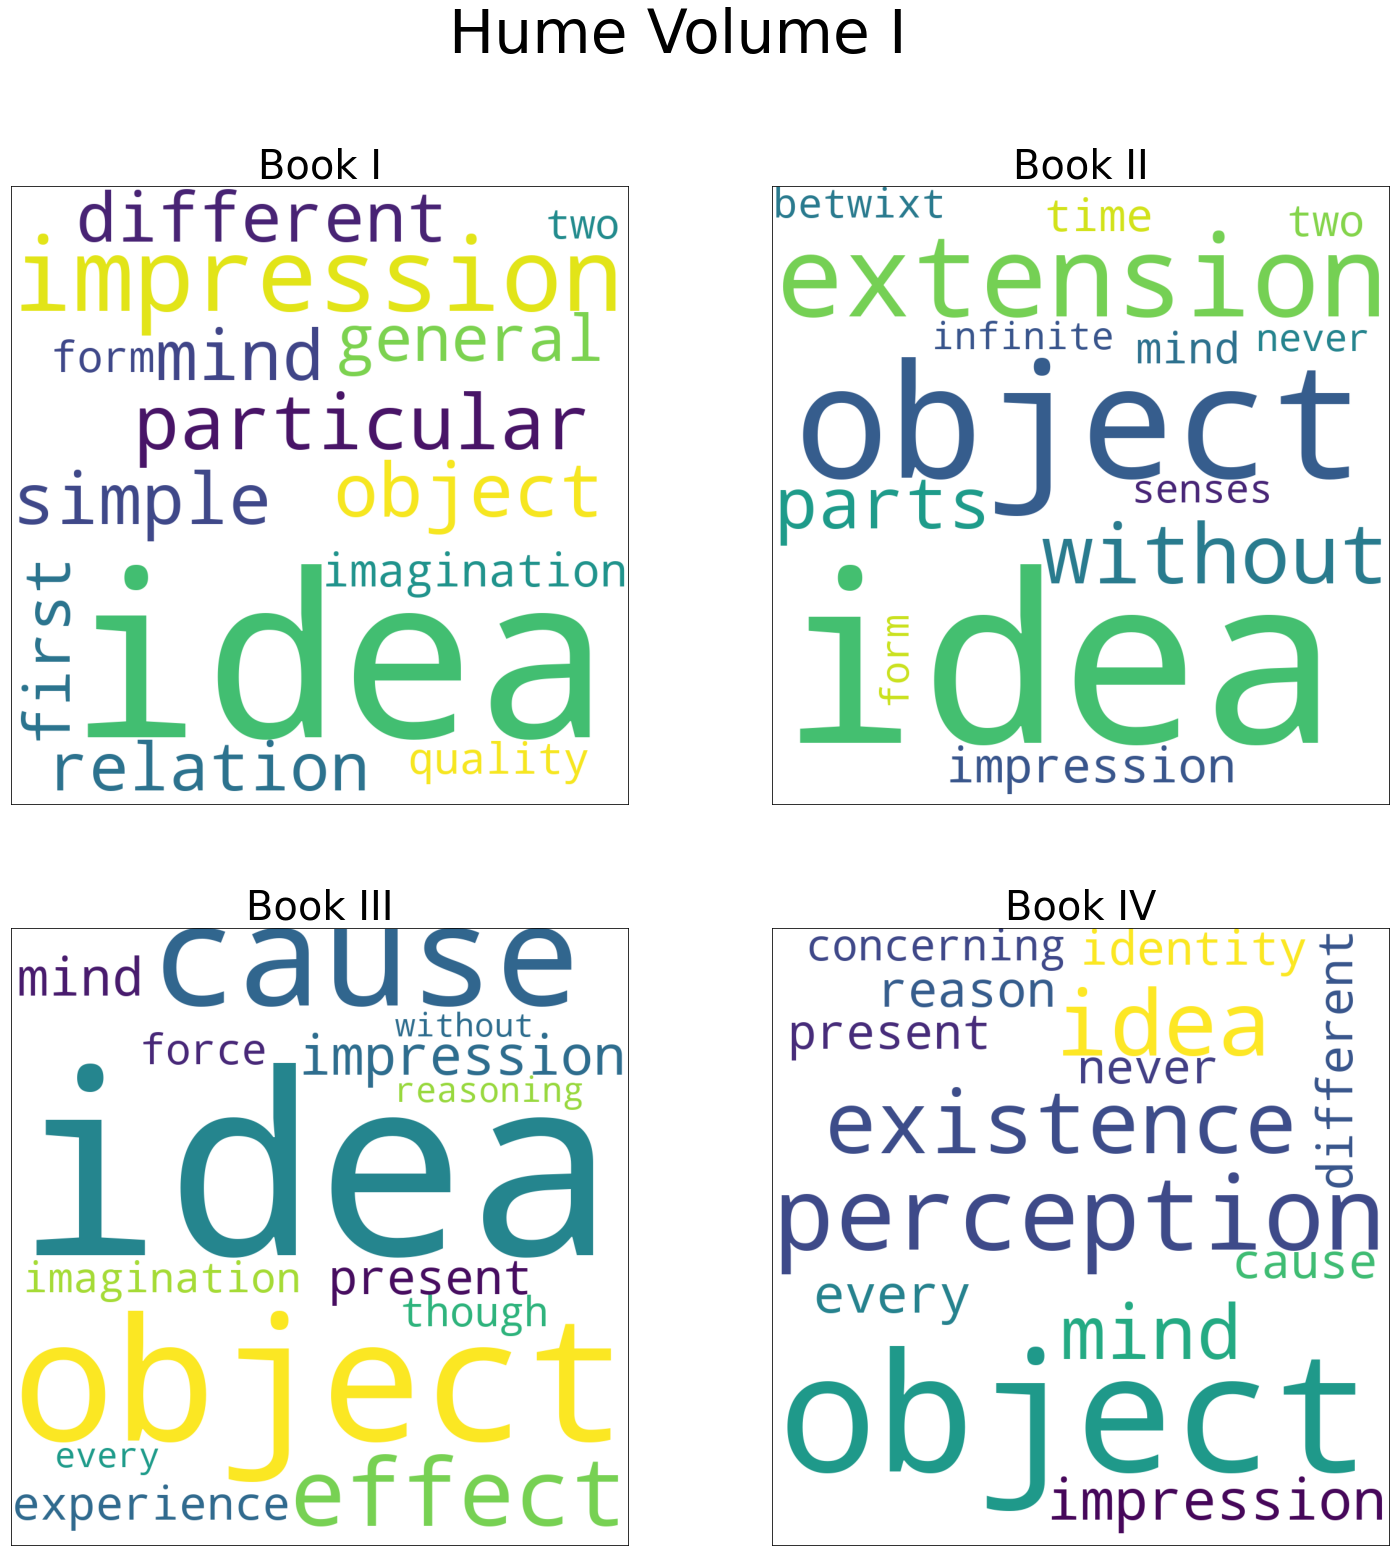

In [19]:
fig, axs = plt.subplots (2,2,figsize=(25,25))
fig.suptitle('Hume Volume I',size=60)
axs[0,0].xaxis.set_visible(False)
axs[0,0].yaxis.set_visible(False)
axs[0,0].set_title('Book I', size = 40)
axs[0,0].imshow(wc_b1p1)

axs[0,1].xaxis.set_visible(False)
axs[0,1].yaxis.set_visible(False)
axs[0,1].set_title('Book II', size = 40)
axs[0,1].imshow(wc_b1p2)

axs[1,0].xaxis.set_visible(False)
axs[1,0].yaxis.set_visible(False)
axs[1,0].set_title('Book III', size = 40)
axs[1,0].imshow(wc_b1p3)

axs[1,1].xaxis.set_visible(False)
axs[1,1].yaxis.set_visible(False)
axs[1,1].set_title('Book IV', size = 40)
axs[1,1].imshow(wc_b1p4)

#ax = plt.gca()
#ax.axes.xaxis.set_visible(False)
#ax.axes.yaxis.set_visible(False)

#plt.imshow(wc_b1p1)




parse file into volumes